In [5]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [6]:
def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

In [8]:
data = pd.read_csv("SMSSpamCollection", delimiter="\t", names=['Label', 'Message'])
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [10]:
data['Message'] = data['Message'].apply(preprocess_text)
data

,Label,Message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like id ...


In [11]:
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(data['Message'])
y = data['Label']

In [20]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
model_nb = MultinomialNB().fit(x_train, y_train)
model_nb

MultinomialNB()

In [15]:
y_pred = model_nb.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

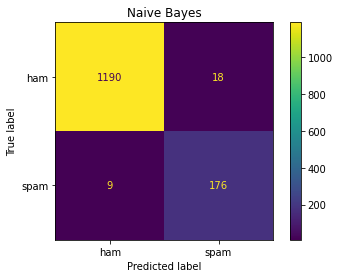

In [16]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Naive Bayes')
plt.show()

In [17]:
# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9806173725771715


In [18]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1208
        spam       0.91      0.95      0.93       185

    accuracy                           0.98      1393
   macro avg       0.95      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [23]:
def predict_sms(input_sms):
    input_vectorized = vectorizer.transform([input_sms])
    prediction = model_nb.predict(input_vectorized)
    if prediction[0] == 0:
        return "ham"
    else:
        return "spam"

In [24]:
user_input = input("\nEnter an SMS message to check if it's spam or ham: ")
prediction = predict_sms(user_input)
print(f"The message is predicted to be: {prediction}")


Enter an SMS message to check if it's spam or ham: Today is ml submission
The message is predicted to be: spam
